In [1]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from matplotlib import cm

In [2]:
# get the colormap and extract 7 colors
viridis = cm.get_cmap('viridis', 15)

In [3]:
file = "Resources/project_one_data.csv"
data = pd.read_csv(file)
data = data[data['Age'] > 15]
# data = data[data['State'] == ?]
data

,Unnamed: 0,Serial Number,State,Transportation,Wages,Education,Parent Origin,Age,Internet,Region,Laptop,# of Vehicles
0,0,84,1,NaN,0.0,19.0,0.0,19,NaN,3,NaN,NaN
1,1,154,1,1.0,52000.0,20.0,0.0,55,1.0,3,1.0,3.0
2,2,154,1,11.0,0.0,16.0,0.0,56,1.0,3,1.0,3.0
3,3,154,1,NaN,0.0,19.0,0.0,21,1.0,3,1.0,3.0
4,4,154,1,NaN,0.0,19.0,0.0,21,1.0,3,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2582037,3132789,1490418,56,NaN,0.0,16.0,0.0,86,3.0,4,2.0,0.0
2582038,3132790,1490639,56,1.0,50000.0,20.0,0.0,59,1.0,4,1.0,1.0
2582039,3132791,1490649,56,NaN,6600.0,20.0,0.0,58,NaN,4,NaN,NaN
2582040,3132792,1491926,56,1.0,600.0,21.0,0.0,29,1.0,4,1.0,2.0


In [4]:
df_education = data[data["Education"]>= 15.0]
df_education

,Unnamed: 0,Serial Number,State,Transportation,Wages,Education,Parent Origin,Age,Internet,Region,Laptop,# of Vehicles
0,0,84,1,NaN,0.0,19.0,0.0,19,NaN,3,NaN,NaN
1,1,154,1,1.0,52000.0,20.0,0.0,55,1.0,3,1.0,3.0
2,2,154,1,11.0,0.0,16.0,0.0,56,1.0,3,1.0,3.0
3,3,154,1,NaN,0.0,19.0,0.0,21,1.0,3,1.0,3.0
4,4,154,1,NaN,0.0,19.0,0.0,21,1.0,3,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2582037,3132789,1490418,56,NaN,0.0,16.0,0.0,86,3.0,4,2.0,0.0
2582038,3132790,1490639,56,1.0,50000.0,20.0,0.0,59,1.0,4,1.0,1.0
2582039,3132791,1490649,56,NaN,6600.0,20.0,0.0,58,NaN,4,NaN,NaN
2582040,3132792,1491926,56,1.0,600.0,21.0,0.0,29,1.0,4,1.0,2.0


In [5]:
df_education['Education'] = df_education['Education'].replace({15: '[0] 12th grade - No Diploma', 
                                                               16: "[1] High School Diploma", 
                                                               17: '[2] GED',
                                                               18: '[3] Less Than 1 Year of College', 
                                                               19: "[4] Some College - No Degree",
                                                               20: "[5] Associate's", 
                                                               21: "[6] Bachelor's", 
                                                               22: "[7] Master's",
                                                               23: "[8] Professional Degree Beyond a Bachelor's", 
                                                               24: '[9] Doctorate Degree',
                                                               })
df_education.head()
                                                              

<ipython-input-5-0a85d675c823>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_education['Education'] = df_education['Education'].replace({15: '[0] 12th grade - No Diploma',


,Unnamed: 0,Serial Number,State,Transportation,Wages,Education,Parent Origin,Age,Internet,Region,Laptop,# of Vehicles
0,0,84,1,NaN,0.0,[4] Some College - No Degree,0.0,19,NaN,3,NaN,NaN
1,1,154,1,1.0,52000.0,[5] Associate's,0.0,55,1.0,3,1.0,3.0
2,2,154,1,11.0,0.0,[1] High School Diploma,0.0,56,1.0,3,1.0,3.0
3,3,154,1,NaN,0.0,[4] Some College - No Degree,0.0,21,1.0,3,1.0,3.0
4,4,154,1,NaN,0.0,[4] Some College - No Degree,0.0,21,1.0,3,1.0,3.0


In [6]:
df_education['Wages']

0               0.0
1           52000.0
2               0.0
3               0.0
4               0.0
             ...   
2582037         0.0
2582038     50000.0
2582039      6600.0
2582040       600.0
2582041    110000.0
Name: Wages, Length: 2193258, dtype: float64

In [7]:
edu_mean = df_education.groupby(["Education"]).mean()["Wages"]

In [8]:
edu_mean.head()

Education
[0] 12th grade - No Diploma        11450.538666
[1] High School Diploma            16230.316474
[2] GED                            14068.289063
[3] Less Than 1 Year of College    19556.000306
[4] Some College - No Degree       20902.403729
Name: Wages, dtype: float64

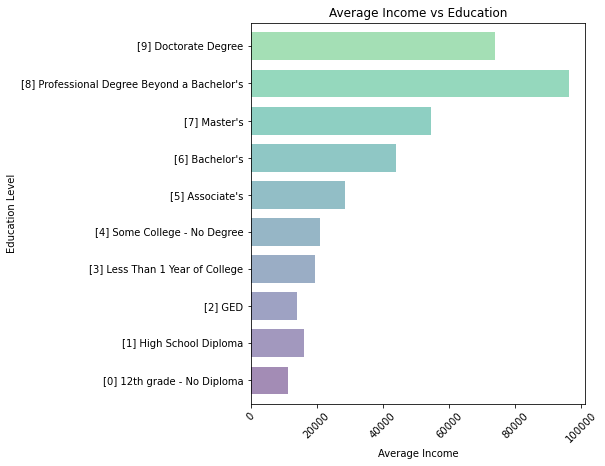

In [9]:
colors =[viridis.colors[1],viridis.colors[2],viridis.colors[3],viridis.colors[4],viridis.colors[5],viridis.colors[6],viridis.colors[7],viridis.colors[8],viridis.colors[9],viridis.colors[10]]
edu_mean.plot(kind="barh", color=colors, alpha=.5, width=.75, figsize=(6,7))
#color="#3CBB75FF"
plt.xticks(rotation=45)
# plt.xlim(-.9, len("Drug Regimen")-.1)
# plt.ylim(0, max(measurements) +50)
plt.title("Average Income vs Education")
plt.xlabel("Average Income")
plt.ylabel("Education Level")
plt.savefig("Images/Avg_Income_vs_Education_Bar.png", bbox_inches='tight')
plt.show()